# BRAIN STORM
Objetivo é lidar com um problema real, e tentar resolver ele usando: Classificação ou Regressão.

Tente fazer uma análise bem abrangente, explicando cada etapa e justificando cada ação escolhida.

Incluir gráficos e tabelas comparativas pode ajudar muito!

# Importando os pacotes

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from scipy.stats import shapiro

## Importando o dataframe

In [3]:
dataframe = pd.read_csv("daily-bike-share.csv")

#### Explicação das colunas
- day: Dia do mês que foram realizados os alugueis
- mnth: Mês do ano que foram realizados os alugueis
- year: Ano que foram realizados os alugueis
- season: Estação do ano que foram realizados os alugueis
    - 1: inverno
    - 2: primavera
    - 3: verão
    - 4: outono
- holiday: Se o dia foi feriado (1) ou não (0)
- weekday: Dia da semana (domingo = 0 : sabado = 6)
- workingday: Se o dia não foi feriado ou final de semana é atribuido "1", caso contrário, "0"
- weathersit: Situação do tempo
    - 1: Claro, Poucas nuvens, Parcialmente nublado, Parcialmente nublado
    - 2: Névoa + Nublado, Névoa + Nuvens quebradas, Névoa + Poucas nuvens, Névoa
    - 3: Neve fraca, Chuva fraca + Trovoada + Nuvens dispersas, Chuva fraca + Nuvens dispersas
    - 4: Chuva Forte + Paletes de Gelo + Tempestade + Névoa, Neve + Neblina
- temp: Temperatura em Celsius (°C) 
- atemp: Sensação térmica em Celsius (°C) 
- hum: Umidade do ar
- windspeed: Velocidade do vento
- rentals: Quantidade de bicicletas alugadas

#### DEFINIÇÃO DO PROBLEMA: à partir dos dados sobre alugueis de bicicletas, visa-se à predição do número de alugueis dadas características específicas do dia (temperatura, condição climática, estação do ano etc.)

## Explorando o dataframe

In [4]:
dataframe.shape

(731, 13)

In [5]:
dataframe.columns

Index(['day', 'mnth', 'year', 'season', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'rentals'],
      dtype='object')

In [6]:
dataframe.head()

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   day         731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   year        731 non-null    int64  
 3   season      731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  rentals     731 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.4 KB


In [8]:
dataframe.describe()

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,15.738714,6.519836,2011.500684,2.496580,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471
std,8.809949,3.451913,0.500342,1.110807,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488
min,1.000000,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000
25%,8.000000,4.000000,2011.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000
50%,16.000000,7.000000,2012.000000,3.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000
75%,23.000000,10.000000,2012.000000,3.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000
max,31.000000,12.000000,2012.000000,4.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000


In [9]:
nulos = dataframe.isnull().sum()
nulos

day           0
mnth          0
year          0
season        0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
rentals       0
dtype: int64

In [38]:
round(dataframe.corr(),3)

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
day,1.000,0.009,0.002,-0.001,-0.011,-0.000,0.010,-0.024,0.024,0.018,0.043,0.022,-0.013
mnth,0.009,1.000,-0.002,0.831,0.019,0.010,-0.006,0.044,0.220,0.227,0.222,-0.208,0.123
year,0.002,-0.002,1.000,-0.002,0.008,-0.005,-0.002,-0.049,0.048,0.046,-0.111,-0.012,0.249
season,-0.001,0.831,-0.002,1.000,-0.011,-0.003,0.012,0.019,0.334,0.343,0.205,-0.229,0.210
holiday,-0.011,0.019,0.008,-0.011,1.000,-0.102,-0.253,-0.035,-0.029,-0.033,-0.016,0.006,0.054
weekday,-0.000,0.010,-0.005,-0.003,-0.102,1.000,0.036,0.031,-0.000,-0.008,-0.052,0.014,0.060
workingday,0.010,-0.006,-0.002,0.012,-0.253,0.036,1.000,0.061,0.053,0.052,0.024,-0.019,-0.518
weathersit,-0.024,0.044,-0.049,0.019,-0.035,0.031,0.061,1.000,-0.121,-0.122,0.591,0.040,-0.247
temp,0.024,0.220,0.048,0.334,-0.029,-0.000,0.053,-0.121,1.000,0.992,0.127,-0.158,0.543
atemp,0.018,0.227,0.046,0.343,-0.033,-0.008,0.052,-0.122,0.992,1.000,0.140,-0.184,0.544


<AxesSubplot: >

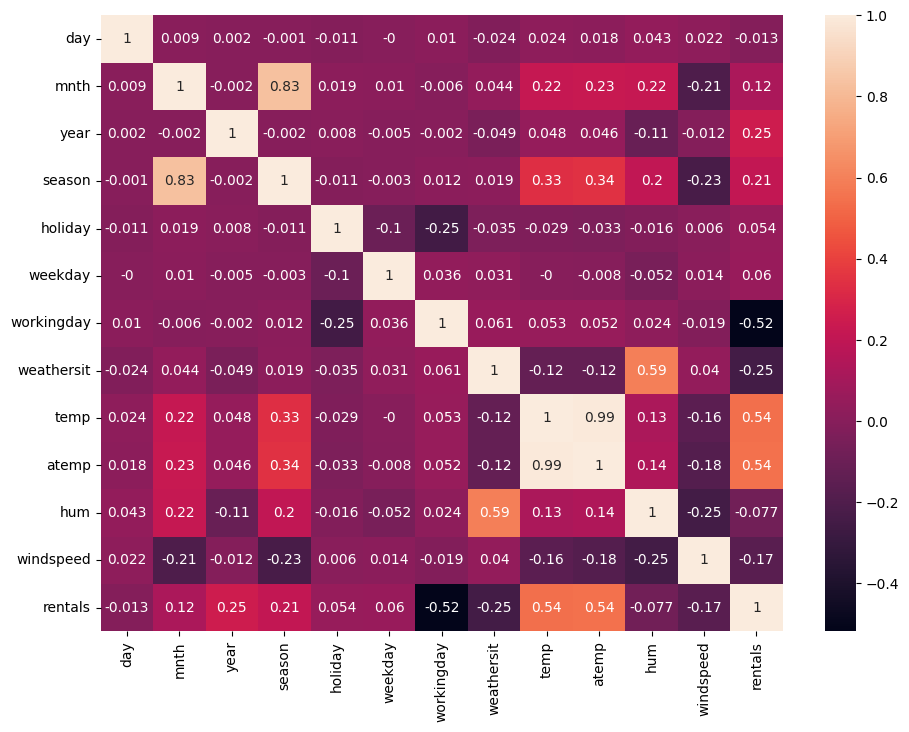

In [44]:
plt.figure(figsize=(11,8))
sns.heatmap(round(dataframe.corr(),3), annot=True)

In [48]:
print(f'Variável - Estatistica - valor p')
for i in ['temp', 'atemp', 'hum', 'windspeed', 'rentals']:
    shp = shapiro(dataframe[i])
    if shp.pvalue <= 0.05:
        pvalue = "(<=0.05)"
    else:
        pvalue =  round(shp.pvalue, 3)
    print(f'{i} - {round(shp.statistic, 3)} - {pvalue}')

Variável - Estatistica - valor p
temp - 0.966 - (<=0.05)
atemp - 0.974 - (<=0.05)
hum - 0.993 - (<=0.05)
windspeed - 0.971 - (<=0.05)
rentals - 0.885 - (<=0.05)


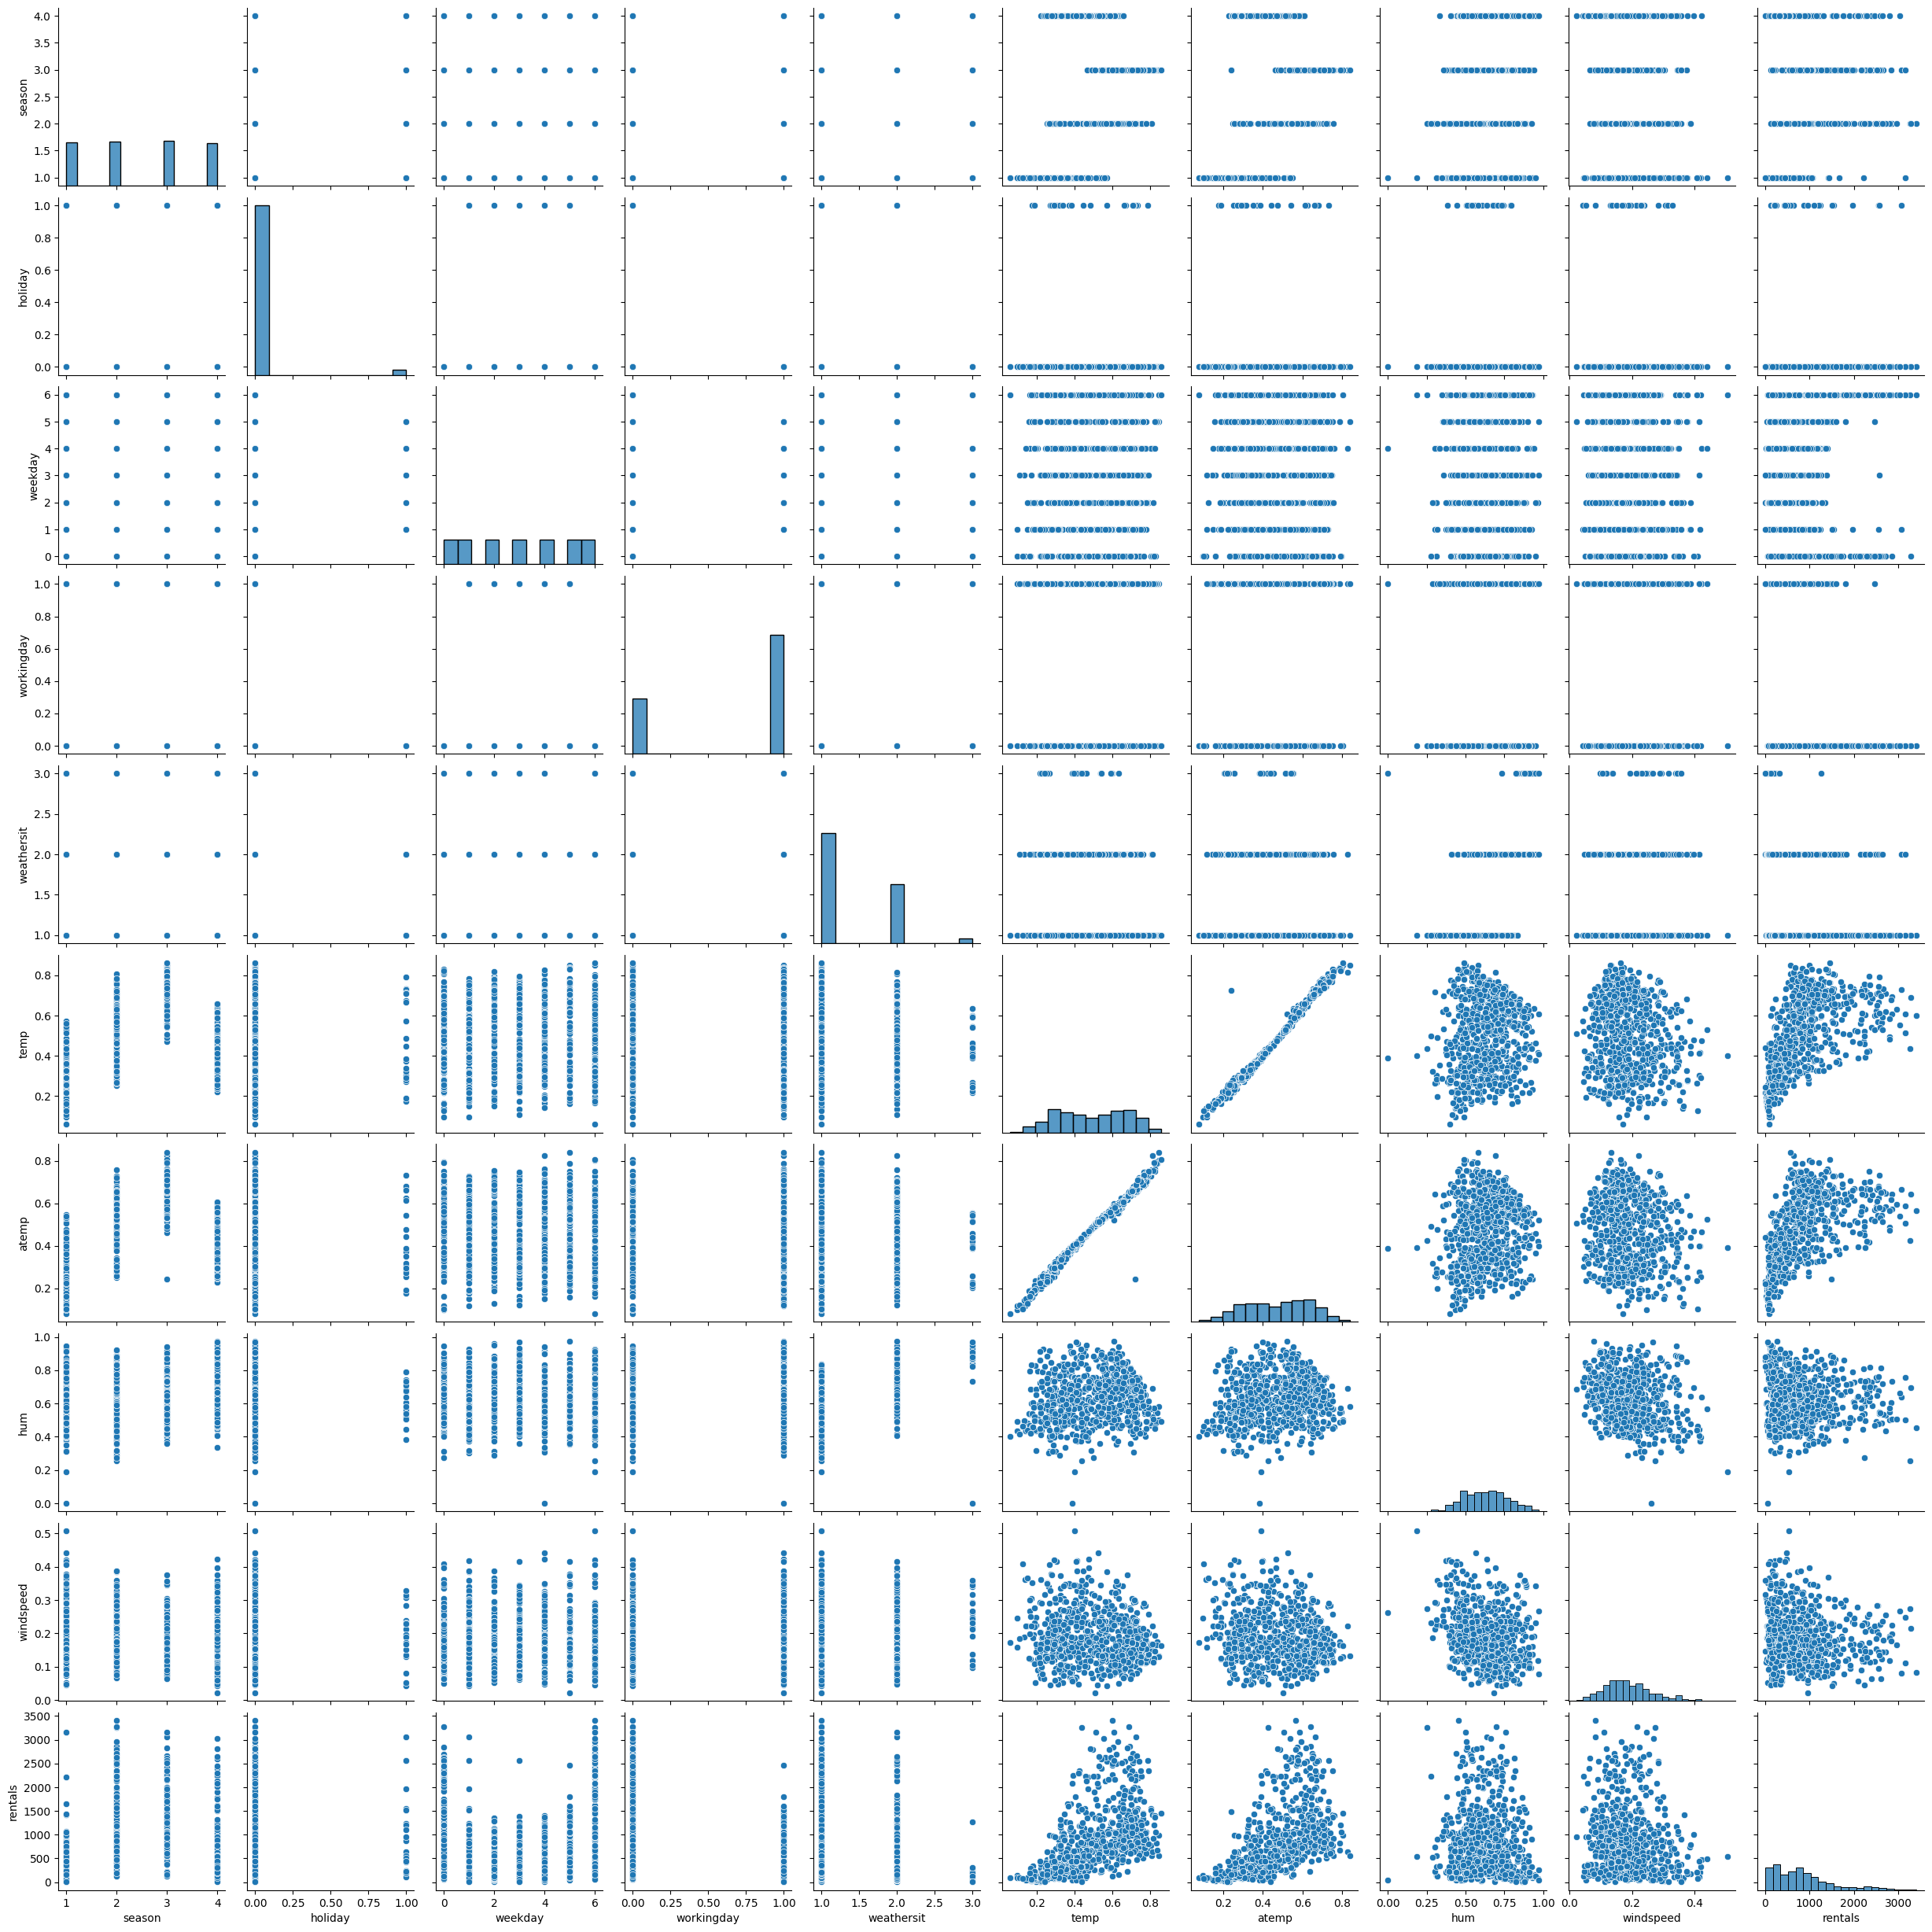

In [47]:
sns.pairplot(dataframe[['season', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'rentals']])

## Hipótese

count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: rentals, dtype: float64
1.2664540319434734


<Axes: xlabel='rentals', ylabel='Count'>

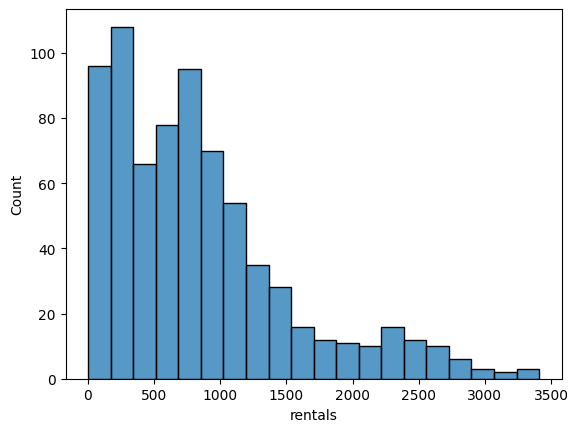

In [12]:
# Nosso Target
print( dataframe['rentals'].describe() )

# Calcule a assimetria
print( dataframe['rentals'].skew() )


sns.histplot(data=dataframe, x='rentals')

<Axes: xlabel='Log_rentals', ylabel='Count'>

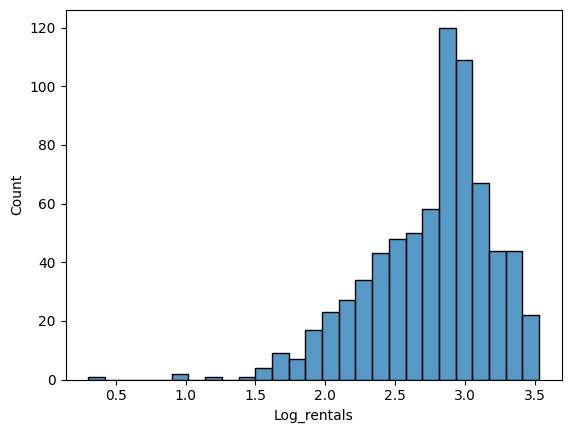

In [14]:
# Calculando o log do nosso target

dataframe['Log_rentals'] = np.log10(dataframe['rentals'])

sns.histplot(data=dataframe, x='Log_rentals')

## Escolhendo os hiperparâmetros desejados

## Separando os dados em dados de treino e dados de teste

## Treine o modelo, usando os dados de treino

## Use o modelo treinado para fazer previsões usando os dados de teste (ou de validação)

## Avalie a performance do modelo

## Deploy

Ciclo de machine learning.

- 0) Conhecer os dados com os quais estamos trabalhando --- fazer todo o processo de EDA, etc., etc.


- 1) Importar a **classe do estimador que se deseja treinar** - escolher a hipótese!
    - Usaremos a biblioteca [scikit-learn](https://scikit-learn.org/stable/)
  
  
- 2) Instanciar a classe do estimador, **escolhendo os hiperparâmetros desejados**
    - Para a primeira versão do modelo, pode ser uma boa escolha utilizar os hiperparâmetros default;
    - Veremos mais pra frente como escolher os hiperparâmetros adequadamente;
   
   
- 3) Separe os dados em **dados de treino** e **dados de teste**.
    - Em alguns casos, pode ser interessante criar também um conjunto de **dados de validação**
    - Para fazer a separação, usamos o [train-test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    
    
- 4) Treine o modelo, usando **os dados de treino**


- 5) Use o modelo treinado para **fazer previsões** usando os **dados de teste** (ou **de validação**)


- 6) **Avalie a performance do modelo com base nas previsões acima**


- 7) Se necessário, reinicie o ciclo!


- 8) Quando o modelo estiver suficientemente bom, faça o **deploy**